### Codio Activity 15.4: Convexity

**Expected Time = 60 minutes**

**Total Points = 50**

This activity focuses on determining the convexity of a given function.  Your goal is to identify whether or not a function has the appropriate convexity for finding a maximum or a minimum value.  In addition to the approach introduced in the lectures, you will also explore how the second derivative can be used to explore convexity.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Jensen's Inequality

Recall from the lecture the inequality:

$$tf(x_0) + (1 - t)f(x_1) \geq f(tx_0 + (1 - t)x_1)$$

In this assignment, your goal is to build intuition behind what this inequality says about a functions convexity by comparing the results of the inequality applied to two basic quadratic functions -- $f(x) = x^2$ and $g(x) = -x^2$.  You will select sample points $x_0 = a$ and $x_1 = b$ and explore the secant lines relationship to points in between $x_0$ and $x_1$.

[Back to top](#-Index)

### Problem 1

#### Defining the Functions

**10 Points**


To begin, define functions $f$ and $g$ as defined below.  Also, using `np.linspace` to define a domain `x` from $x = [-2, 2]$ with 100 equally spaced points. 

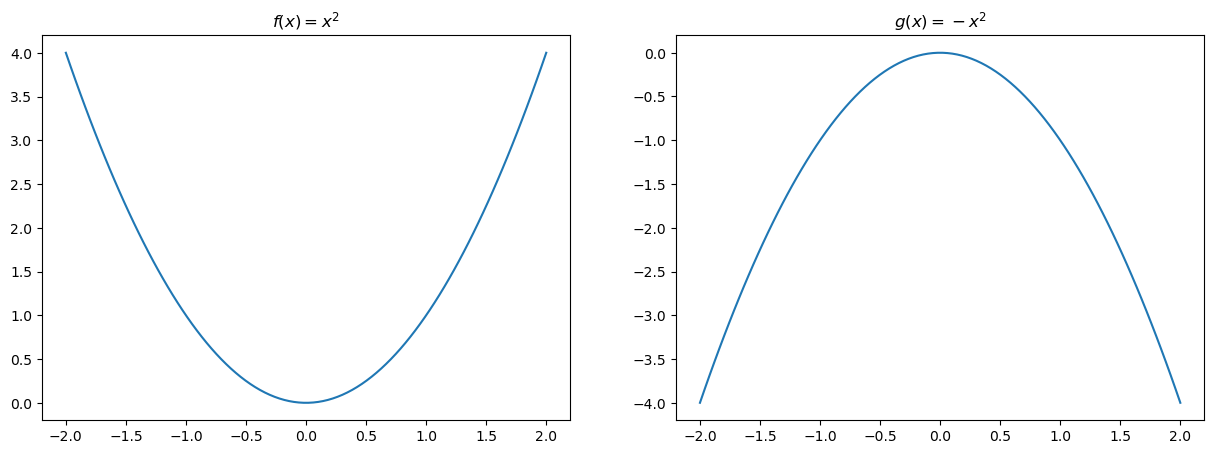

In [4]:
### GRADED
def f(x):
    return x**2

def g(x):
    return -x**2

x = np.linspace(-2, 2, 100)

### Answer Check
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(x, f(x), label = 'f')
ax[0].set_title(r'$f(x) = x^2$')
ax[1].plot(x, g(x), label = 'g')
ax[1].set_title(r'$g(x) = -x^2$');

[Back to top](#-Index)

### Problem 2

#### A Secant Line

**10 Points**


omplete the function `secant_f` that takes in the following arguments:

- `x`: The domain to evaluate function on
- `x0`: The first x-coordinate of secant line
- `x1`: The second x-coordinate of secant line

This function should return a linear equation between the points $(x_0, f(x_0))$ and $(x_1, f(x_1))$.  

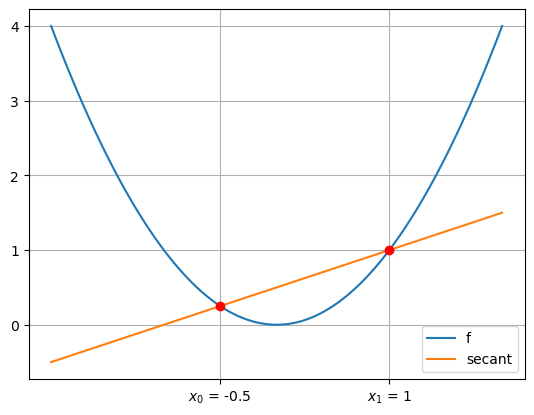

In [6]:
### GRADED
def secant_f(x, x0, x1):
    m = (f(x0) - f(x1))/(x0 - x1)
    return m * (x - x0) + f(x0)

### Answer Check
plt.plot(x, f(x), label = 'f')
plt.plot(x, secant_f(x, -0.5, 1), label = 'secant')
plt.plot(-0.5, f(-0.5), 'ro')
plt.plot(1, f(1), 'ro')
plt.xticks([-0.5, 1], [r'$x_0$ = -0.5', r'$x_1$ = 1'])
plt.legend()
plt.grid();

[Back to top](#-Index)

### Problem 3

#### Consider a value between $x_0$ and $x_1$

**10 Points**


Note the term $tx_0 + (1 - t)x_1$ in the Jensen's inequality.  This is considered for all $t \in [0, 1]$.  

Effectively, this considers all points between $x_0$ and $x_1$.  You will only consider the point where $t = 0.5$.  Determine this value as `x_t`and calculate its corresponding values`s_x_t` and `f_x_t` using `secant(x_t)` and `f(x_t)`, respectively.

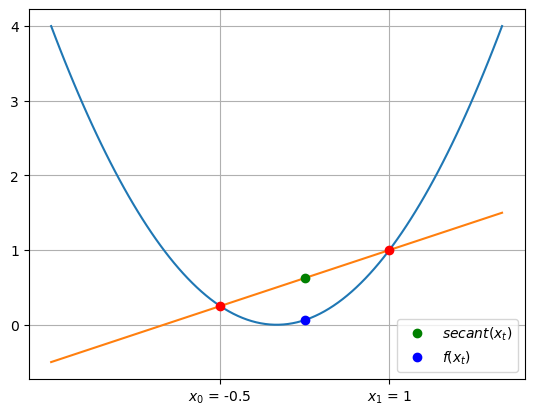

In [8]:
### GRADED
# YOUR CODE HERE
x_t = 0.5*-0.5 + 0.5*1
s_x_t = secant_f(x_t, -0.5, 1)
f_x_t = f(x_t)

# ### Answer Check
plt.plot(x, f(x))
plt.plot(x, secant_f(x, -0.5, 1))
plt.plot(-0.5, f(-0.5), 'ro')
plt.plot(1, f(1), 'ro')
plt.plot(x_t, s_x_t, 'go', label = r'$secant(x_t)$')
plt.plot(x_t, f_x_t, 'bo', label = r'$f(x_t)$')
plt.xticks([-0.5, 1], [r'$x_0$ = -0.5', r'$x_1$ = 1'])
plt.legend()
plt.grid();

[Back to top](#-Index)

### Problem 4

#### The Important Comparison

**10 Points**


If the Jensen's inequality essentially  is true for every point between $x_0$ and $x_1$ and all values $t \in [0, 1]$ then the function is convex.  

Repeat the above process for the function $g(x)$ by first defining a function `secant_g`.  How much greater is `g(0.5x_0 + 0.5x_1)` than `secant_g(x, x_0, x_1)` where `x_0 = -0.5` and `x_1 = 1`?  Assign your values to `g_x_t` and `secant_g_x_t` respectively.

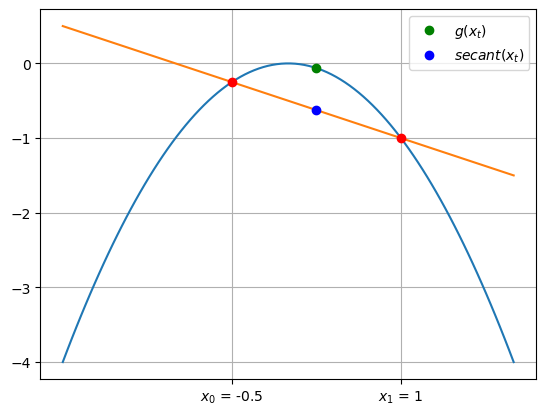

In [10]:
### GRADED
# YOUR CODE HERE
def secant_g(x, x0, x1):
    return (g(x0) - g(x1))/(x0 - x1)*(x - x0) + g(x0) 
g_x_t = g(x_t)
secant_g_x_t = secant_g(x_t, -0.5, 1.0)

# ### Answer Check
plt.plot(x, g(x))
plt.plot(x, secant_g(x, -0.5, 1))
plt.plot(-0.5, g(-0.5), 'ro')
plt.plot(1, g(1), 'ro')
plt.plot(x_t, g_x_t, 'go', label = r'$g(x_t)$')
plt.plot(x_t, secant_g_x_t, 'bo', label = r'$secant(x_t)$')
plt.xticks([-0.5, 1], [r'$x_0$ = -0.5', r'$x_1$ = 1'])
plt.legend()
plt.grid();

[Back to top](#-Index)

### Problem 5

#### A Different Loss Function

**10 Points**

Instead of the squared loss function, consider an absolute value function given below. Note this mimics the **Mean Absolute Error** function.  

Is this function convex or not?  Consider a secant line that includes $x_0 = 0$ and assign your answer as a boolean to `is_convex`.

In [ ]:
def mae(x):
    return abs(x)

In [ ]:
plt.plot(x, mae(x))
plt.title(r'Absolute Value function $f(x) = |x|$')
plt.grid();

In [ ]:
### GRADED
is_convex = True

# ### Answer Check
print(f'The function is convex: {is_convex}')